In [2]:
# Всё как обычно. Грузим модули, данные, смотрим корреляцию, убираем 100% корелирующий столбец,
# создаем модель классификатора, сетку параметров, фитим, через best_estimator выводим вес фичей
import pandas as pd
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [3]:
stat_data = pd.read_csv('C:\\Users\\Uldum\\Downloads\\space_can_be_a_dangerous_place.csv')
stat_data

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1
...,...,...,...,...,...,...,...,...
99995,301.7,249.0,39.8244,0.397064,0,1,1,1
99996,194.0,350.0,25.6080,-1.062202,0,1,1,1
99997,201.4,112.0,26.5848,1.571040,0,1,1,1
99998,7.8,115.0,1.0296,-1.206575,0,1,1,1


In [4]:
stat_data.dangerous.value_counts()

1    90202
0     9798
Name: dangerous, dtype: int64

<AxesSubplot:>

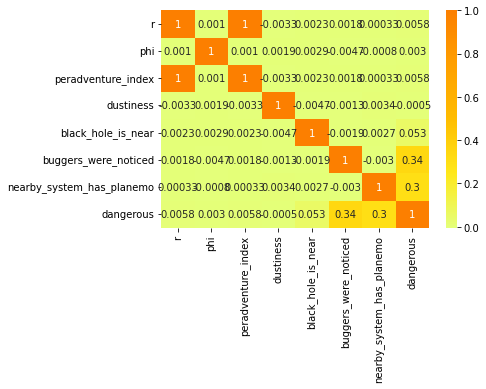

In [15]:
corr = stat_data.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True)

<AxesSubplot:>

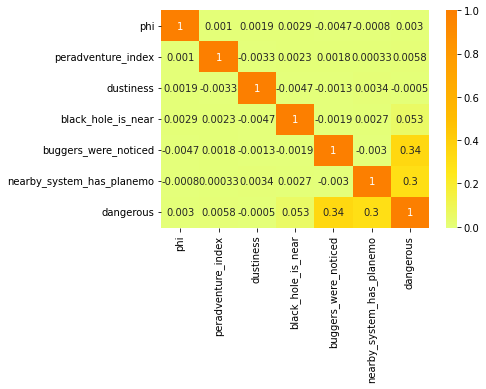

In [8]:
corr = stat_data.drop(columns = 'r').corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True)

In [11]:
X = stat_data.drop(columns = ['r', 'dangerous'])
y = stat_data['dangerous']
X

,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo
0,138.0,22.3212,0.706285,0,1,1
1,148.0,1.4652,-0.410512,1,1,1
2,201.0,36.2472,0.756457,1,1,1
3,173.0,22.8096,0.035221,1,1,1
4,222.0,29.4756,0.197271,0,1,1
...,...,...,...,...,...,...
99995,249.0,39.8244,0.397064,0,1,1
99996,350.0,25.6080,-1.062202,0,1,1
99997,112.0,26.5848,1.571040,0,1,1
99998,115.0,1.0296,-1.206575,0,1,1


In [13]:
clf_rf = RandomForestClassifier(random_state=0, n_jobs=-1)
parametrs = {'n_estimators': range(10, 20, 5), 'max_depth': range(2, 8, 2)}
gs_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5, n_jobs=-1)
gs_cv_clf.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': range(2, 8, 2),
                         'n_estimators': range(10, 20, 5)})

<AxesSubplot:>

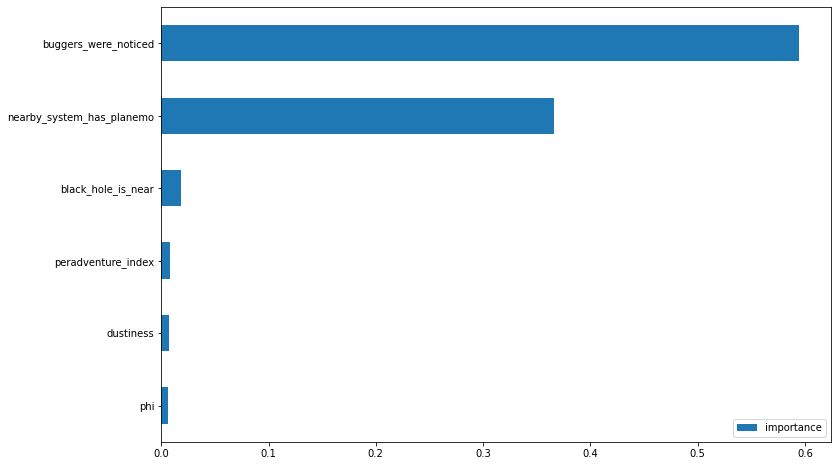

In [14]:
imp = pd.DataFrame(gs_cv_clf.best_estimator_.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))